Run all cells marked `In [ ]` using the [$\blacktriangleright$ Run] button above and **think about the result you see**.
Be sure to do all exercises (in blank cells) and run all completed code cells. 

If anything goes wrong, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart). Or run text cells to get the formatted text back from markdown.

---

# Dictionaries and DataFrames

Let's explore some useful data types and new ways of interacting with data.

## Python Dictionaries


A *dictionary of keys* or `dict` is a data type with pairs of `KEY:value` entries. They are defined in *curly brackets* and the values can be different types. For example:

In [1]:
fruit={"apple":"A red fruit.", "banana":"A yellow fruit.", "tomato":"A red fruit."}

You can then *look up* (or change) an item's value in the dictionary using its *key*:

In [2]:
fruit["banana"]

'A yellow fruit.'

In [3]:
fruit["apple"] = "A red or green fruit."

fruit["apple"]

'A red or green fruit.'

New entries can also be added:

In [4]:
fruit["aubergine"] = "A purple fruit"

fruit

{'apple': 'A red or green fruit.',
 'banana': 'A yellow fruit.',
 'tomato': 'A red fruit.',
 'aubergine': 'A purple fruit'}

The *values* can also be numerical, allowing us to count things:

### Create a new _empty_ dictionary:

In [ ]:
eggs={} #we can start with an empty dict

This contains no values and needs filling with entries:

In [ ]:
eggs["hen"]=1 #if the key does not exist it is added to the dictionary
eggs["duck"]=5
print(eggs)

In [ ]:
eggs["hen"]+=1 # += is a shorthand for "add one to the value"

print(eggs)

Entries can also be lists or arrays (or any other object)

In [5]:
import numpy as np

thedata = dict() #another way of making an empty dictionary

thedata["Days"] = list(range(1,8))
thedata["Temperatures"] = np.array([23.3, 16.9, 21.8, 26.9, 23.5, 21.7, 19.8])

thedata

{'Days': [1, 2, 3, 4, 5, 6, 7],
 'Temperatures': array([23.3, 16.9, 21.8, 26.9, 23.5, 21.7, 19.8])}

Which can also be manipulated:

In [6]:
thedata["Temperatures"] = thedata["Temperatures"]-10

thedata["Temperatures"]

array([13.3,  6.9, 11.8, 16.9, 13.5, 11.7,  9.8])

## Data Frames and Pandas

Pandas is a very powerful data analysis library that extends on the functionality of numpy and matplotlib.  
It can be used to load, analyse plot and save data.

### See the comprehensive cheatsheet on moodle for full information about Pandas


The basic data types used by pandas are the dataframe and the series. Here we'll look at dataframes, which are 2D arrays with labels and related to a spreadsheet.



In [7]:
import pandas as pd

# make a dataframe called df out of our previous dictionary:
df = pd.DataFrame(thedata)
print(df)

   Days  Temperatures
0     1          13.3
1     2           6.9
2     3          11.8
3     4          16.9
4     5          13.5
5     6          11.7
6     7           9.8


In Jupyter-Notebooks dataframes will display with nice formatting by putting just their name at the end of a code cell:

In [8]:
df

,Days,Temperatures
0,1,13.3
1,2,6.9
2,3,11.8
3,4,16.9
4,5,13.5
5,6,11.7
6,7,9.8


Columns can be accessed in the same way as dictionaries:

In [9]:
df["Temperatures"]

0    13.3
1     6.9
2    11.8
3    16.9
4    13.5
5    11.7
6     9.8
Name: Temperatures, dtype: float64

And they can be manipulated like Numpy arrays:

In [10]:
average = df["Temperatures"].mean()
print(average)

deviation = df["Temperatures"]-average
print(deviation)

11.985714285714284
0    1.314286
1   -5.085714
2   -0.185714
3    4.914286
4    1.514286
5   -0.285714
6   -2.185714
Name: Temperatures, dtype: float64


As well as writing new columns:

In [11]:
df["Deviations"] = deviation

df

,Days,Temperatures,Deviations
0,1,13.3,1.314286
1,2,6.9,-5.085714
2,3,11.8,-0.185714
3,4,16.9,4.914286
4,5,13.5,1.514286
5,6,11.7,-0.285714
6,7,9.8,-2.185714


This can then be saved as a CSV using `df.to_csv("<FILENAME>.csv")` or even an Excel spreadsheet:

* Note: the `index=False` argument makes sure the left-hand index column (`[0,1,2,3,4,5,6]`) does **not** get written to the spreadsheet.
* The `sheet_name` argument allows you to name the sheet tab in Excel.

In [12]:
df.to_excel("devdata.xlsx", index=False, sheet_name="Temperature Deviations")

In [14]:
df.to_csv("devdata.csv", index=False)

* Now download and open the `devdata.xlsx` file that was just created!

Lists and arrays can also be used to make Data-Frames:

In [15]:
import numpy as np
import pandas as pd

temps = np.array([23.3, 16.9, 21.8, 26.9, 23.5, 21.7, 19.8])
average = temps.mean()
devs = temps-average # deviation of each point from the mean
stdev = temps.std() # standard deviation of the dataset
zscore = devs/stdev # Z-score is the number of standard deviations each reading is from the mean
data = [temps, devs, zscore]

mynewdataframe = pd.DataFrame(data)
mynewdataframe

,0,1,2,3,4,5,6
0,23.300000,16.900000,21.800000,26.900000,23.500000,21.700000,19.800000
1,1.314286,-5.085714,-0.185714,4.914286,1.514286,-0.285714,-2.185714
2,0.452977,-1.752823,-0.064008,1.693739,0.521908,-0.098473,-0.753320


In [16]:
# rotate the dataframe:
newdata = mynewdataframe.transpose()
newdata

,0,1,2
0,23.3,1.314286,0.452977
1,16.9,-5.085714,-1.752823
2,21.8,-0.185714,-0.064008
3,26.9,4.914286,1.693739
4,23.5,1.514286,0.521908
5,21.7,-0.285714,-0.098473
6,19.8,-2.185714,-0.753320


* Data can be accessed and manipulated in similar ways to 2D arrays, but also accessed by the column name, new columns can be inserted etc.

A dataframe also has an *object* variable `.columns` inside which describes the column headings.
* In the above example `newdata.columns = [0, 1, 2]` by default.

#### Renaming the columns

In [17]:
newdata.columns = "Temp", "Deviation", "Z-value"

newdata

,Temp,Deviation,Z-value
0,23.3,1.314286,0.452977
1,16.9,-5.085714,-1.752823
2,21.8,-0.185714,-0.064008
3,26.9,4.914286,1.693739
4,23.5,1.514286,0.521908
5,21.7,-0.285714,-0.098473
6,19.8,-2.185714,-0.753320




A dataframe also has a `.index` property naming the rows, which can be changed:

In [18]:
newdata.index = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

newdata

,Temp,Deviation,Z-value
Mon,23.3,1.314286,0.452977
Tue,16.9,-5.085714,-1.752823
Wed,21.8,-0.185714,-0.064008
Thu,26.9,4.914286,1.693739
Fri,23.5,1.514286,0.521908
Sat,21.7,-0.285714,-0.098473
Sun,19.8,-2.185714,-0.753320


See the very comprehensive sheet on moodle (also ones such as [this one](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)) to find out more details.

### Importing spreadsheet data

It is possible to import data into a data-frame from plain text files, CSV files or even excel spreadsheets.

In [19]:
import pandas as pd

data = pd.read_excel("Files/Case Study Data.xlsx", sheet_name="Data")

data

/opt/conda/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,Project,Region,Country,Type,Rating,Cost.Million.USD,Total.Area.sqm,Total.Delivered.kWh,Delivered.Intensity.KWh.sqm.y,Electricity.Intensity.kWh.sqm.y,Gas.Intensity.kWh.sqm.y,Water.L.sqm,PV.Intensity.kWh.sqm,Solar.Thermal.kWh.sqm,Steam.kWh.sqm,District.Heating.Intensity.kWh.sqm,District.Cooling.Intensity.kWh.sqm,CHP.generated.Elec.kWh.sqm,CHP.generated.Heat.kWh.sqm,Biomass.Boiler.kWh.sqm.y
0,Manitoba Hydro Place,Americas,Canada,Commercial,LEED-Platinum,269.660000,65000.000000,7.280000e+06,112.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Child Development Centre,Americas,Canada,University,LEED-Platinum,22.310000,11612.140575,1.817300e+06,156.500000,47.000000,105.000000,69.000000,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FIPKE Centre for Innovative Research,Americas,Canada,University,Green-Globe-5,30.555000,6323.794118,2.365099e+06,374.000000,307.000000,67.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Transoceanica,Americas,Chile,Commercial,LEED-Gold,20.924644,13959.068901,7.496020e+05,53.700000,53.700000,NaN,330.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,The Cooper Union,Americas,United States,University,LEED-Platinum,112.000000,16255.124535,8.745257e+06,538.000000,306.000000,232.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Biodesign Institute B,Americas,United States,University,LEED-Platinum,78.500000,27184.466019,2.520000e+07,927.000000,NaN,NaN,602.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,DELL Children's Medical Center of Central Texas,Americas,United States,Hospital,LEED-Platinum,137.000000,43948.234956,3.990500e+07,908.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Kroon Hall,Americas,United States,University,LEED-Platinum,33.500000,6205.254065,6.105970e+05,98.400000,83.000000,NaN,130.000000,15.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Newark Center at Ohlone College,Americas,United States,University,LEED-Platinum,58.000000,12806.321244,1.235810e+06,96.500000,38.750078,4.305564,425.000000,5.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Tahoe Center for Environmental Sciences,Americas,United States,University,LEED-Platinum,25.000000,4374.310680,4.505540e+05,103.000000,60.277898,7.534737,NaN,6.458346,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Individual columns can be extracted using the following syntax:

In [20]:
projects = data["Project"]

print(projects)

0                                Manitoba Hydro Place
1                            Child Development Centre
2                FIPKE Centre for Innovative Research
3                                       Transoceanica
4                                    The Cooper Union
5                               Biodesign Institute B
6     DELL Children's Medical Center of Central Texas
7                                          Kroon Hall
8                     Newark Center at Ohlone College
9             Tahoe Center for Environmental Sciences
10              Center for Health and Healing, Oregon
11                   NREL Research Support Facility 1
12                                        Twelve West
13                               2000 Tower Oaks Blvd
14                                      Regent's Hall
15                                 Great River Energy
16                Lewis & Clark State Office building
17                            Johnson Controls Campus
18                          

And subsets can be pulled from the data and made into their own dataframe.

In [21]:
selected_columns = ["Total.Area.sqm", "Cost.Million.USD"]

data2 = data[selected_columns]

data2.index = projects # from the previous cell

data2

,Total.Area.sqm,Cost.Million.USD
Project,,
Manitoba Hydro Place,65000.000000,269.660000
Child Development Centre,11612.140575,22.310000
FIPKE Centre for Innovative Research,6323.794118,30.555000
Transoceanica,13959.068901,20.924644
The Cooper Union,16255.124535,112.000000
Biodesign Institute B,27184.466019,78.500000
DELL Children's Medical Center of Central Texas,43948.234956,137.000000
Kroon Hall,6205.254065,33.500000
Newark Center at Ohlone College,12806.321244,58.000000


In [22]:
import pandas as pd

data = pd.read_excel("Files/Case Study Data.xlsx", sheet_name="Data")

cost = data["Cost.Million.USD"]
area = data["Total.Area.sqm"]
costpermetre2 = cost/area

# create a new column
data["Cost.Per.sqm"] = costpermetre2


selected_columns = ["Project", "Total.Area.sqm", "Cost.Million.USD", "Cost.Per.sqm"]

# create a new DataFrame with the selected columns as the data and set the project name column as the index
newdata = data[selected_columns].set_index("Project")

newdata

/opt/conda/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,Total.Area.sqm,Cost.Million.USD,Cost.Per.sqm
Project,,,
Manitoba Hydro Place,65000.000000,269.660000,0.004149
Child Development Centre,11612.140575,22.310000,0.001921
FIPKE Centre for Innovative Research,6323.794118,30.555000,0.004832
Transoceanica,13959.068901,20.924644,0.001499
The Cooper Union,16255.124535,112.000000,0.006890
Biodesign Institute B,27184.466019,78.500000,0.002888
DELL Children's Medical Center of Central Texas,43948.234956,137.000000,0.003117
Kroon Hall,6205.254065,33.500000,0.005399
Newark Center at Ohlone College,12806.321244,58.000000,0.004529


Pandas is very good at plotting the data.

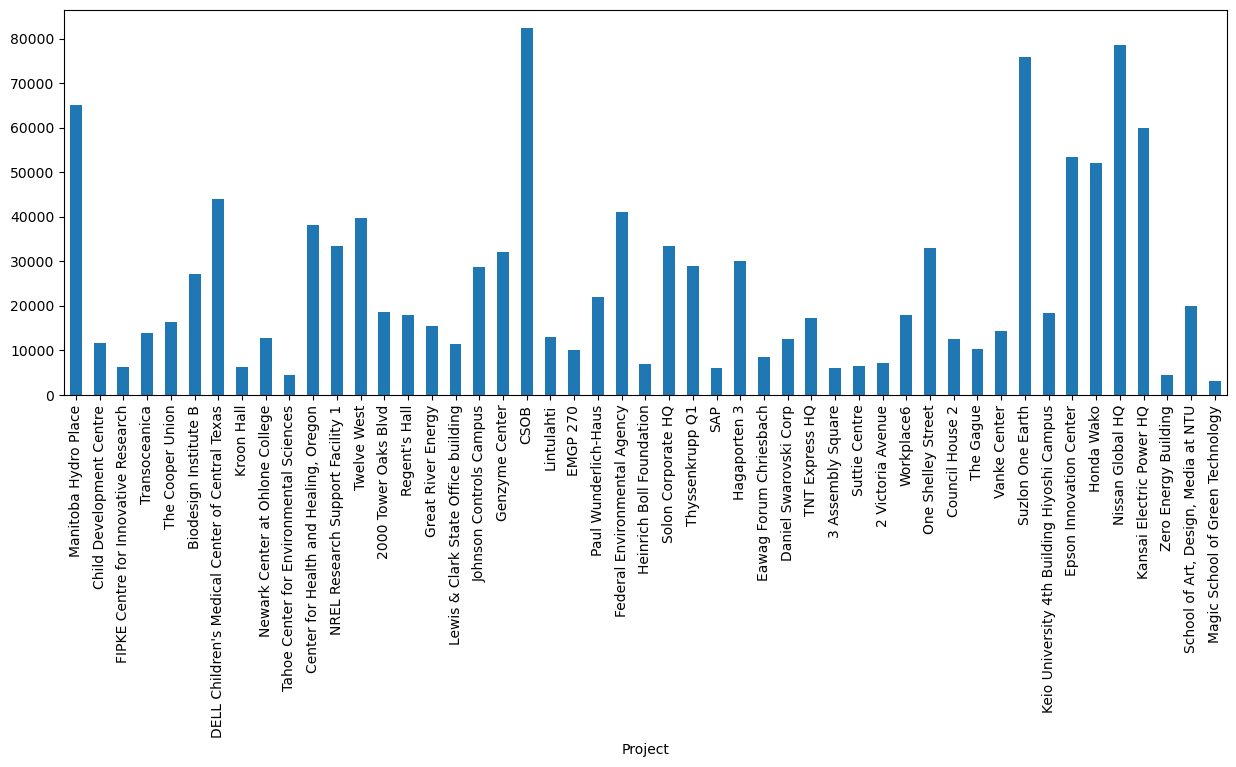

In [23]:
ax = newdata["Total.Area.sqm"].plot(kind="bar", figsize=(15,5)) # returns a set of figure axes

Different plot styles are available

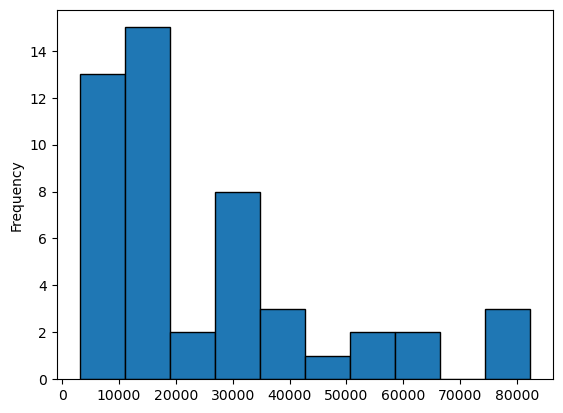

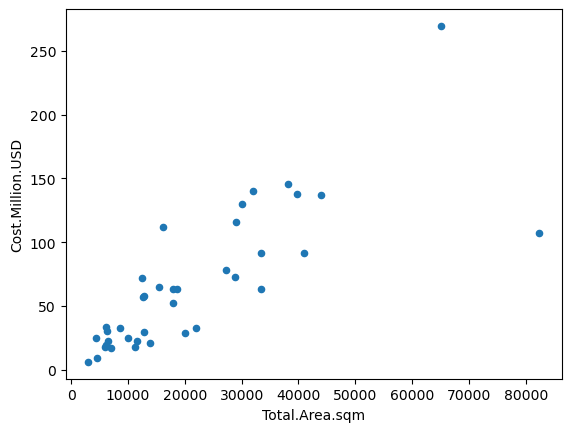

In [24]:
ax1 = newdata["Total.Area.sqm"].plot.hist(edgecolor="black")
ax2 = newdata.plot.scatter(x="Total.Area.sqm", y="Cost.Million.USD")

Plots can be saved or manipulated using this method:

In [25]:
ax2.figure.savefig("scatterplot.png") # how to access the figure canvas and save it

And plots can appear on the same axes or in subplots.

In [ ]:
sortdata = newdata.sort_values(by="Total.Area.sqm")

ax3 = sortdata.plot.bar(subplots=True, figsize=(15,9))

### Filtering data:

Data can also be filtered in the following way:

In [29]:
costmilUSD = data2["Cost.Million.USD"] #select the column 

condition = costmilUSD>100 #filter selected values

data3 = data2[condition]

data3

,Total.Area.sqm,Cost.Million.USD
Project,,
Manitoba Hydro Place,65000.000000,269.66
The Cooper Union,16255.124535,112.00
DELL Children's Medical Center of Central Texas,43948.234956,137.00
"Center for Health and Healing, Oregon",38143.178709,145.40
Twelve West,39747.000000,138.00
Genzyme Center,32021.614035,140.00
CSOB,82365.580435,107.00
Thyssenkrupp Q1,29000.000000,116.00
Hagaporten 3,30000.000000,130.00


* Try breaking this down and printing each line to see what's going on in each step.

This can then be combined into a single line, which is more compact but harder to read.
```python
data3 = data2[data2["Cost.Million.USD"]>100]
```
